In [ ]:
!pip install pandas
!pip install numpy
!pip install nltk
!pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/hackathon/dreamdata.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import nltk

# # Download necessary NLTK data
# nltk.download('punkt', download_dir='C:/Users/Dhruv/nltk_data')
# nltk.download('stopwords', download_dir='C:/Users/Dhruv/nltk_data')
# nltk.download('vader_lexicon', download_dir='C:/Users/Dhruv/nltk_data')  # For SentimentIntensityAnalyzer


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Initialize NLP tools
nltk.download('punkt') # Download 'punkt' to the default location
nltk.download('stopwords') # Download 'stopwords' to the default location
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

# Load dataset
df = pd.read_csv(file_path)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,Unnamed: 0,dreamer,description,number,date,content,text_cleaned,Z1,Z2,nb_words,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,1,alta,Alta: a detailed dreamer,1,1957,"The one at the Meads's house, where it's bigge...",one mead house big inside european village ins...,14.818585,11.913500,174,1,2,0,1,1,2,1,3,2,6
1,2,alta,Alta: a detailed dreamer,2,8/11/67,I'm at a family reunion in a large fine house ...,family reunion large fine house ground maybe r...,14.774185,12.026687,261,1,4,3,2,1,5,0,5,5,7
2,3,alta,Alta: a detailed dreamer,3,8/1/85,I watch a plane fly past and shortly realize i...,watch plane fly past shortly realize low crash...,14.487709,12.045825,335,3,8,2,6,1,6,3,6,9,7
3,4,alta,Alta: a detailed dreamer,4,1985,Me pulling the green leaves and berries off so...,pull green leaf berry branch bush live one gro...,14.803592,11.984078,485,7,5,4,8,7,9,4,10,16,15
4,5,alta,Alta: a detailed dreamer,5,1985,I'm in a room that reminds me of (but definite...,room remind definitely living room house stree...,14.916678,12.033846,578,3,8,3,4,8,4,4,9,8,17


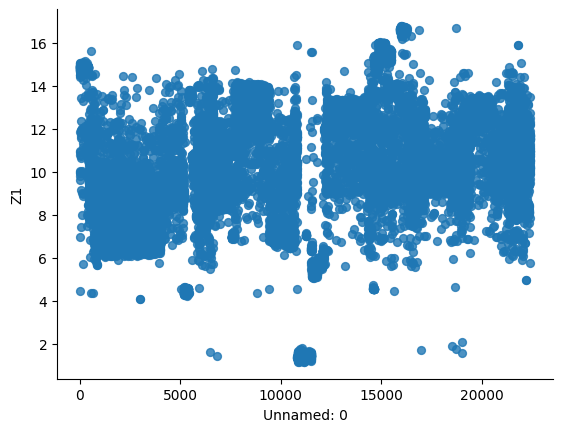

In [ ]:
# @title Unnamed: 0 vs Z1

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unnamed: 0', y='Z1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
sid = SentimentIntensityAnalyzer()

# Text Preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stop words and non-alphabetic words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['text_cleaned'] = df['content'].apply(preprocess_text)


In [ ]:
# Topic Modeling using LDA
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['text_cleaned'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

# Sentiment Analysis
def analyze_sentiment(text):
    return sid.polarity_scores(text)

df['sentiment'] = df['text_cleaned'].apply(analyze_sentiment)
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])


Topic #0:
website kevin chloe earl bubba iti jens working trout dissertation
Topic #1:
peaches barney defecating cuzco duet trimming ufo jung buttered meatballs
Topic #2:
like going room said house man people dream went know
Topic #3:
patient ward marissa hospital named sex patients fellatio camden sexual
Topic #4:
printing working press marissa tooth liturgy excel deer cas andrew


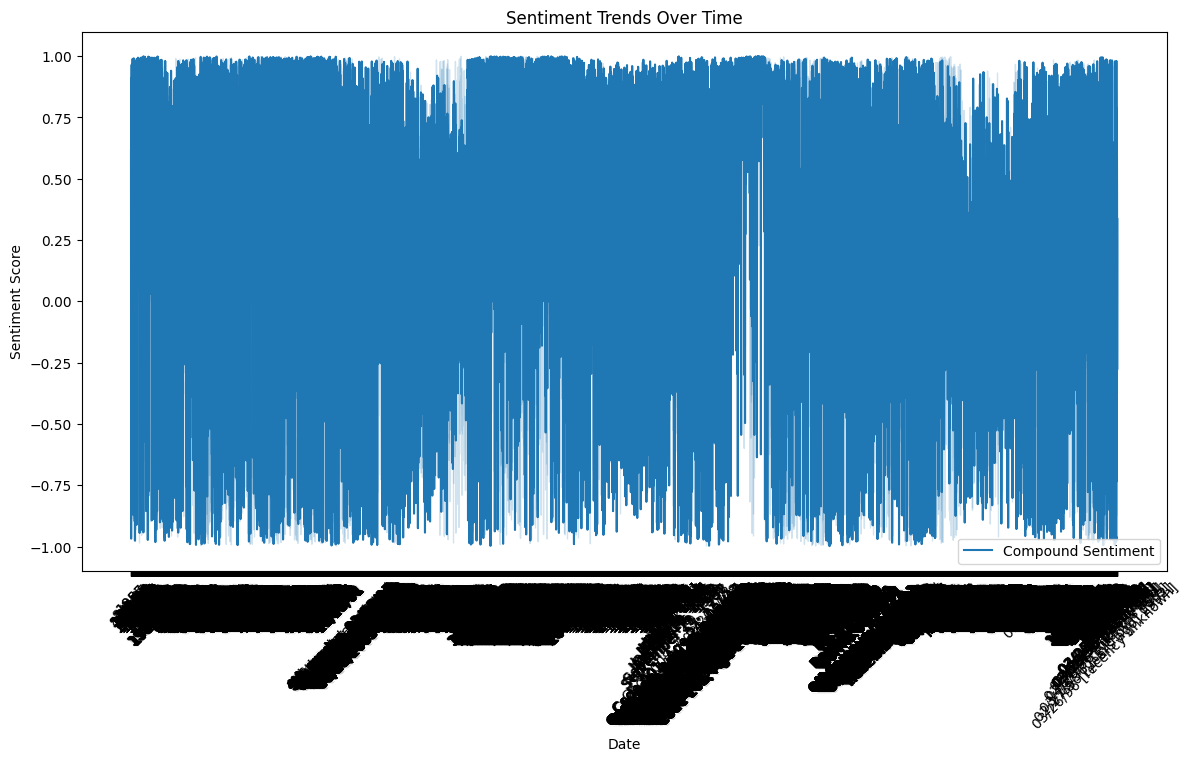

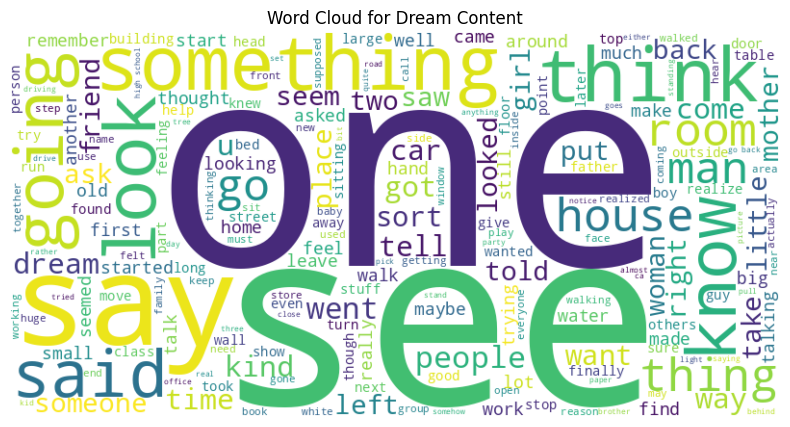

In [ ]:
# Plotting Emotional Trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='compound', label='Compound Sentiment')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Over Time')
plt.legend()
plt.show()

# Word Cloud for Dream Content
text = ' '.join(df['text_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dream Content')
plt.show()


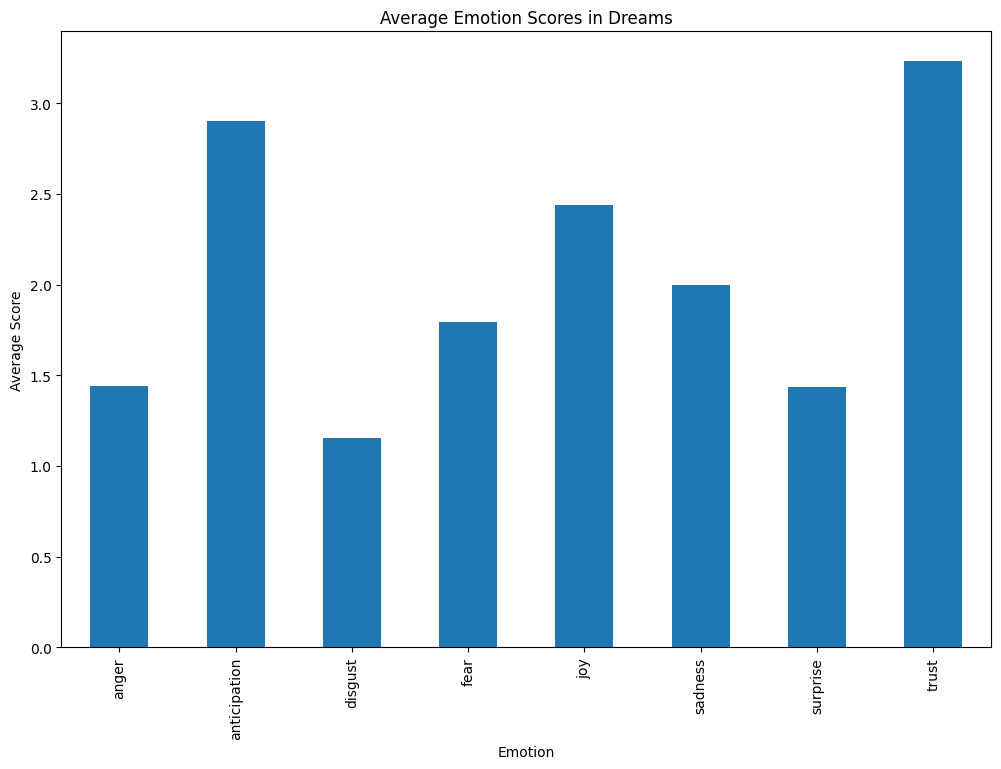

['Alta: a detailed dreamer' 'Alta: a detailed dreamer'
 'Alta: a detailed dreamer' ... 'West Coast teenage girls'
 'West Coast teenage girls' 'West Coast teenage girls']


In [ ]:
# Emotional Distribution
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
plt.figure(figsize=(12, 8))
df[emotions].mean().plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.title('Average Emotion Scores in Dreams')
plt.show()

# Example of classification (if needed)
# Use emotion scores to predict a categorical variable
X_emotion = df[emotions]
y = df['description']  # Using 'description' as the target variable

# Scaling
scaler = StandardScaler()
X_emotion_scaled = scaler.fit_transform(X_emotion)

# Classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_emotion_scaled, y)

# Predictions (for example purposes)
predictions = clf.predict(X_emotion_scaled)
print(predictions)

In [ ]:
#OLD CODE CHECK AGAIN
# # Check if 'dream_type' column exists
# if 'dream_type' not in df.columns:
#     raise ValueError("'dream_type' column not found in dataset")

# # Text Preprocessing Function
# def preprocess_text(text):
#     tokens = word_tokenize(text.lower())
#     tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
#     return ' '.join(tokens)

# df['text_cleaned'] = df['content'].apply(preprocess_text)

# # Topic Modeling
# vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
# X = vectorizer.fit_transform(df['text_cleaned'])

# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda_features = lda.fit_transform(X)

# # Add topic probabilities to the dataframe
# lda_columns = [f'Topic_{i}' for i in range(lda_features.shape[1])]
# df = pd.concat([df, pd.DataFrame(lda_features, columns=lda_columns)], axis=1)

# # Sentiment Analysis
# def analyze_sentiment(text):
#     return sid.polarity_scores(text)

# df['sentiment'] = df['text_cleaned'].apply(analyze_sentiment)
# df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# # Prepare data for classification
# X_features = df[lda_columns + ['compound']]
# y = df['dream_type']  # Ensure this column exists and contains labels

# # Check if there are any missing values
# if X_features.isnull().any().any() or y.isnull().any():
#     raise ValueError("Data contains missing values. Please clean the dataset.")

# # Scaling
# scaler = StandardScaler()
# X_features_scaled = scaler.fit_transform(X_features)

# # Train classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_features_scaled, y)

# # Function to classify new dream input
# def classify_dream(user_input):
#     user_input_cleaned = preprocess_text(user_input)
#     user_input_vector = vectorizer.transform([user_input_cleaned])
#     user_input_topics = lda.transform(user_input_vector)
#     user_input_sentiment = analyze_sentiment(user_input)

#     features = np.hstack([user_input_topics, np.array([user_input_sentiment['compound']])])
#     features_scaled = scaler.transform([features])

#     prediction = clf.predict(features_scaled)
#     return prediction[0]

# # Example usage
# user_input = "I had a dream where I was flying over a beautiful landscape."
# dream_type = classify_dream(user_input)
# print(f"The dream type is: {dream_type}")